In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *
import scipy as scp
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

### 2

#### 2.1

In [3]:
r_proto_solar = 25e-6
err_proto_solar = 5e-6
r_comet = 309e-6
err_comet = 20e-6
r_earth = 149e-6
err_earth = 3e-6

total = err_earth**2/r_earth**2
print(total)
#err_earth/r_earth = np.sqrt(err_proto/r_proto + err_comet/r_comet)

0.00040538714472321074


In [4]:
#doing error propagation

part_from_proto_solar = err_proto_solar**2/r_proto_solar**2

part_from_comet = err_comet**2/r_comet**2

print(part_from_proto_solar/part_from_comet, total)

9.548099999999998 0.00040538714472321074


#### 2.2

##### 2.2.1

In [5]:
mu_N = 1971

mu_t = 98.4

sigma_t = 3.7 #always

sigma_N = np.sqrt(mu_N)

rate = mu_N/mu_t

def err_on_frac(rate, t):
    return np.sqrt(((rate)*(1-(rate)))/t)

d_frac = err_on_frac(rate, mu_t)

print(rate)

20.030487804878046


/var/folders/bp/h0lnb5j91bn1mykh3m6j0dx00000gn/T/ipykernel_5624/722994616.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(((rate)*(1-(rate)))/t)


In [6]:
mu_N = 1971

mu_t = 98.4

sigma_t = 3.7 #always

sigma_N = np.sqrt(mu_N)

f, N, t = symbols('f, N, t')
df, dN, dt = symbols('sigma_t, sigma_N, sigma_t')

f = N/t

lprint(latex(Eq(symbols('f'),f)))

df = sqrt(f.diff(N)**2 * dN**2 + f.diff(t)**2 * dt**2)
d_N = sqrt(f.diff(N)**2 * dN**2)
d_t = sqrt(f.diff(t)**2 * dt**2)

lprint(latex(Eq(symbols('sigma_f'),df)))
lprint(latex(Eq(symbols('sigma_N'),d_N)))
lprint(latex(Eq(symbols('sigma_t'),d_t)))

ff = lambdify((N, dN, t, dt), f)
fdf = lambdify((N, dN, t, dt), df)
fd_N = lambdify((N, dN, t, dt), d_N)
fd_t = lambdify((N, dN, t, dt), d_t)

vN, vdN = mu_N, sigma_N
vt, vdt = mu_t, sigma_t

vf = ff(vN, vdN, vt, vdt)
vdf = fdf(vN, vdN, vt, vdt)
vd_N = fd_N(vN, vdN, vt, vdt)
vd_t = fd_t(vN, vdN, vt, vdt)

lprint(fr'f = ({vf:.1f} \pm {vdf:.1f})')
lprint(fr'dN = {vd_N:.1f}')
lprint(fr'dt = {vd_t:.1f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

##### 2.2.2

In [17]:
dn = 0.5
dt = 0.8

relative_uncertainties = dt/dn

print(relative_uncertainties**2*mu_t, mu_t)



251.90400000000005 98.4


#### 2.3

##### 2.3.1

In [18]:
dataframe = pd.read_csv('data_PylonPositions.csv', header=0)
Ppos, Ppos_unc = dataframe.values.T
dataframe

,# Position,Uncertainty
0,49.376,-1.000
1,51.980,-1.000
2,57.190,-1.000
3,53.239,-1.000
4,39.348,-1.000
...,...,...
100,132.792,0.818
101,130.587,0.846
102,131.470,0.673
103,131.740,0.929


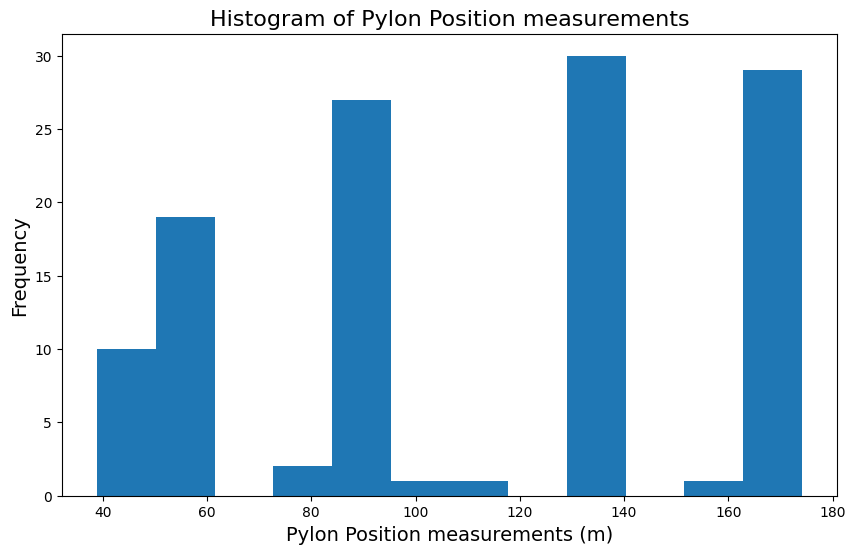

In [61]:
plt.figure(figsize=(10,6))
plt.hist(Ppos, bins=int(12))
plt.xlabel('Pylon Position measurements (m)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram of Pylon Position measurements', fontsize = 16)
plt.savefig('images/PylonPositionHistogram.png')
plt.show()

In [64]:
def histogram(data, bin_count):

    counts, bin_edges = np.histogram(data, bins=bin_count)
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2


    x = bin_centers[counts>0]
    y = counts[counts>0]
    sy = np.sqrt(counts[counts>0])

    return x, y, sy

x, y, sy = histogram(Ppos, 12)


mean1 = np.mean(x[0:2])
mean2 = np.mean(x[2:5])
mean3 = np.mean(x[5:8])
mean4 = np.mean(x[8:12])

err1 = np.std(x[0:2])/np.sqrt(2)
err2 = np.std(x[2:5])/np.sqrt(3)
err3 = np.std(x[5:8])/np.sqrt(3)
err4 = np.std(x[8:12])/np.sqrt(4)

In [65]:
print(mean1, mean2, mean3, mean4)
print(err1, err2, err3, err4)

50.205 89.61149999999999 134.6475 168.42450000000002
3.980657624689669 5.3075434995862265 10.615086999172453 0.0


##### 2.3.2

In [66]:
mask_1 = Ppos < 70
mask_2 = (Ppos >= 70) & (Ppos < 120)
mask_3 = (Ppos >= 120) & (Ppos < 170)
mask_4 = Ppos >= 170
first_pylon = Ppos[mask_1]
second_pylon = Ppos[mask_2]
third_pylon = Ppos[mask_3]
fourth_pylon = Ppos[mask_4]
first_pylon_unc = Ppos_unc[mask_1]
second_pylon_unc = Ppos_unc[mask_2]
third_pylon_unc = Ppos_unc[mask_3]
fourth_pylon_unc = Ppos_unc[mask_4]

def weighted_mean(vals,sigs):
    values = np.array(vals)
    uncertainties = np.array(sigs)

    # Check if lengths match
    if len(values) != len(uncertainties):
        raise ValueError("Values and uncertainties must have the same length.")
    # Check for zero uncertainties to avoid division errors
    if np.any(uncertainties <= 0):
        raise ValueError("Uncertainties must be positive and non-zero.")

    # Calculate the weights
    weights = 1 / (uncertainties ** 2)
    # Calculate the weighted mean
    weighted_mean = np.sum(weights * values) / np.sum(weights)
    # Calculate the uncertainty of the weighted mean
    mean_uncertainty = np.sqrt(1 / np.sum(weights))
    
    
    return weighted_mean, mean_uncertainty

wmean1, werr1 = weighted_mean(first_pylon, abs(first_pylon_unc))
wmean2, werr2 = weighted_mean(second_pylon, abs(second_pylon_unc))
wmean3, werr3 = weighted_mean(third_pylon, abs(third_pylon_unc))
wmean4, werr4 = weighted_mean(fourth_pylon, abs(fourth_pylon_unc))

print(wmean1, wmean2, wmean3, wmean4)
print(werr1, werr2, werr3, werr4)


49.992349886932764 91.83989612441644 135.1286741577792 173.05812722760191
0.2101874553079862 0.1665494849065803 0.15417199899952022 0.17588329485624693


In [73]:
def t_measure(mean0, mean1, err0, err1):
    return np.abs((mean0 - mean1)) / np.sqrt(err0**2 + err1**2)

s1 = [mean1, mean2, mean3, mean4, err1, err2, err3, err4]
s2 = np.array([wmean1, wmean2, wmean3, wmean4, werr1, werr2, werr3, werr4])

ts_from_test = []
ps = []

for i in range(4):
    t = t_measure(s1[i], s2[i], s1[i+4], s2[i+4])
    ts_from_test.append(t)
    ps.append(2.0*scp.stats.norm.cdf(-np.abs(t), loc=0, scale=1))

print(ts_from_test, ps)

[np.float64(0.05334653458049058), np.float64(0.4196479585433008), np.float64(0.045324491059514756), np.float64(26.34489666223874)] [np.float64(0.9574558037286272), np.float64(0.6747426479114491), np.float64(0.9638486664521931), np.float64(5.872189511959213e-153)]


##### 2.3.3

In [94]:
#Using combined measurements to check for equidistance

means = [wmean1, wmean2, wmean3, wmean4]
errors = [werr1, werr2, werr3, werr4]

def equidistance_test(means, errors):
    dist = []
    error_dist = []
    for i in range(len(means)-1):
        dist.append(means[i+1] - means[i])
        error_dist.append(np.sqrt(errors[i]**2 + errors[i+1]**2))


dist1 = means[1] - means[0]
dist2 = means[2] - means[1]
dist3 = means[3] - means[2]

error_dist1 = np.sqrt(errors[1]**2 + errors[0]**2)
error_dist2 = np.sqrt(errors[2]**2 + errors[1]**2)
error_dist3 = np.sqrt(errors[3]**2 + errors[2]**2)

print(dist1, dist2, dist3)
print(error_dist1, error_dist2, error_dist3)



41.84754623748368 43.288778033362746 37.92945306982273
0.26817437851423076 0.22695315859920365 0.2338887314194456


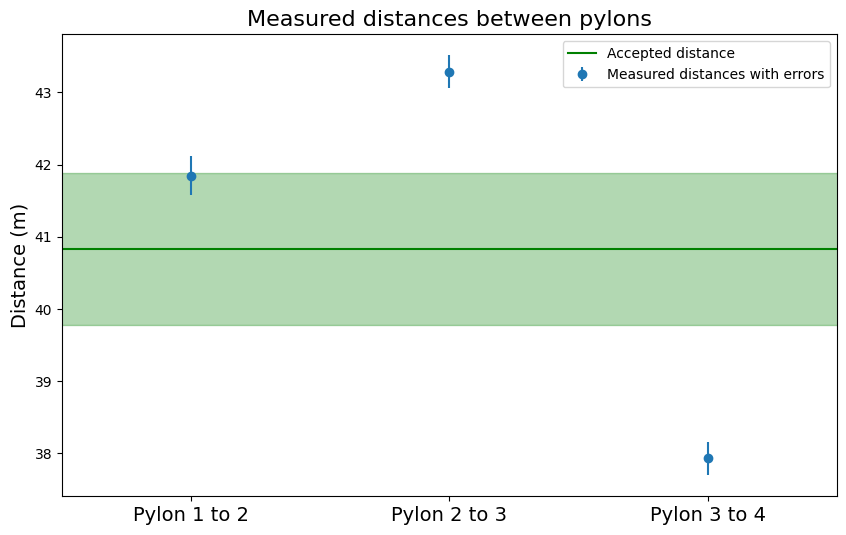

In [102]:
plt.figure(figsize=(10,6))
plt.errorbar([0, 1, 2], [dist1, dist2, dist3], yerr=[error_dist1, error_dist2, error_dist3], fmt='o', label='Measured distances with errors')
plt.xticks([0, 1, 2], ['Pylon 1 to 2', 'Pylon 2 to 3', 'Pylon 3 to 4'], fontsize = 14)
plt.ylabel('Distance (m)', fontsize = 14)
plt.title('Measured distances between pylons', fontsize = 16)
plt.xlim(-0.5, 2.5)
plt.axhline(40.833, color='g', label='Accepted distance')
plt.fill_between([-1, 0, 1, 2, 3], 40.833-1.05, 40.833+1.05, color='g', alpha=0.3)
plt.legend()
plt.savefig('images/MeasuredDistances.png', dpi = 600)